In [29]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../mlrose')
from mlrose_hiive import GeomDecay, ExpDecay, ArithDecay
import numpy as np

In [30]:
MAX_ITERATIONS = 10000
MIN_T = 0.001

TEMPERATURE_LIST = [1, 10, 100, 1000, 10000]
DECAY_LIST = [
    'ExpDecay', 
    'GeomDecay', 
    'ArithDecay',
]

In [31]:
P = 0.8
def get_exp_decay(init_temp):
    r = (
        -np.log(MIN_T / init_temp)
        /
        MAX_ITERATIONS
    )
    print(r)
    return ExpDecay(init_temp=init_temp, exp_const=r, min_temp=MIN_T)
def get_geom_decay(init_temp):
    r = (
        (MIN_T / init_temp) ** (1 / MAX_ITERATIONS)
    )
    print(r)
    return GeomDecay(init_temp=init_temp, decay=r, min_temp=MIN_T)
def get_arith_decay(init_temp):
    r = (
        (init_temp - MIN_T)
        /
        int(MAX_ITERATIONS * P)
    )
    print(r)
    return ArithDecay(init_temp=init_temp, decay=r, min_temp=MIN_T)

0.0013815510557964273
0.9986194028465246
0.124999875


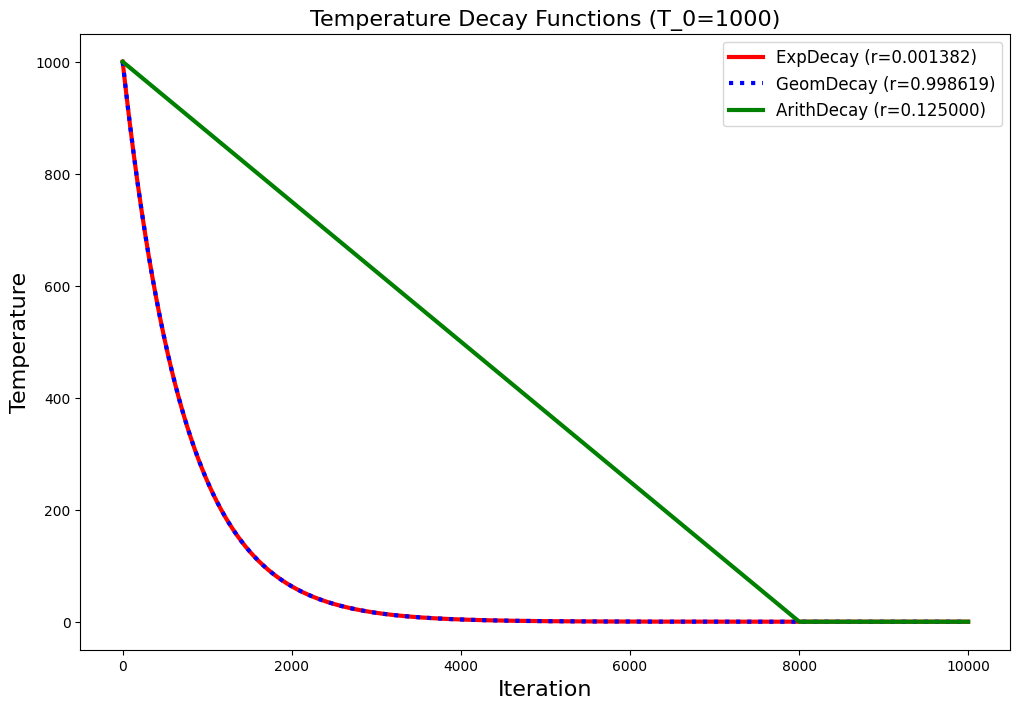

In [32]:
plt.figure(figsize=(12, 8))
fontsize = 16
temperature = 1000
for decay_str in DECAY_LIST:
    if decay_str == 'ExpDecay':
        decay_fn = get_exp_decay(temperature)
        linestyle = '-'
        color = 'red'
        decay_str = f"{decay_str} (r={decay_fn.exp_const:0.6f})"
    elif decay_str == 'GeomDecay':
        decay_fn = get_geom_decay(temperature)
        linestyle = 'dotted'
        color = 'blue'
        decay_str = f"{decay_str} (r={decay_fn.decay:0.6f})"
    elif decay_str == 'ArithDecay':
        decay_fn = get_arith_decay(temperature)
        linestyle = '-'
        color = 'green'
        decay_str = f"{decay_str} (r={decay_fn.decay:0.6f})"
    else:
        raise ValueError('Invalid decay type')
    X = np.arange(0, MAX_ITERATIONS)
    y = [decay_fn.evaluate(i) for i in X]
    plt.plot(X, y, label=decay_str, linestyle=linestyle, lw=3, color=color)
plt.legend(fontsize=12)
plt.title(f"Temperature Decay Functions (T_0={temperature})", fontsize=fontsize)
plt.xlabel("Iteration", fontsize=fontsize)
plt.ylabel("Temperature", fontsize=fontsize)
plt.savefig('metrics/temperature_decay_functions.png')

In [33]:
0.0013815510557964273 + 0.9986194028465246

1.0000009539023211

In [34]:
-np.log(0.9986194028)

np.float64(0.001381551102385439)